<a href="https://colab.research.google.com/github/hafsaaaaaaaa/MLPROJECT_/blob/main/gold_price_prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM


In [2]:
df=pd.read_csv('/content/Gold Price (2013-2023).csv')

In [3]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [5]:
df.drop(['Vol.','Change %'],axis=1,inplace=True)

In [6]:
df

,Date,Price,Open,High,Low
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80"
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20"
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20"
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00"
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55"
...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80"
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30"
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00"
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30"


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)


In [8]:
NumCols=df.columns.drop(['Date'])
df[NumCols]=df[NumCols].replace({',':''},regex=True)
df[NumCols]=df[NumCols].astype('float64')

In [9]:
df.head(10)

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8
5,2013-01-09,1656.5,1660.7,1664.2,1652.3
6,2013-01-10,1679.0,1656.7,1679.2,1656.7
7,2013-01-11,1661.6,1674.8,1675.7,1655.0
8,2013-01-14,1670.4,1662.3,1675.2,1662.3
9,2013-01-15,1684.9,1669.7,1685.3,1669.2


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [12]:
fig=px.line(y=df.Price,x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title='Date',yaxis_title='price',title={'text':'gold price data','y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},plot_bgcolor='rgba(255,233,0,0.9)')

In [13]:
test_size=df[df.Date.dt.year==2022].shape[0]
test_size

260

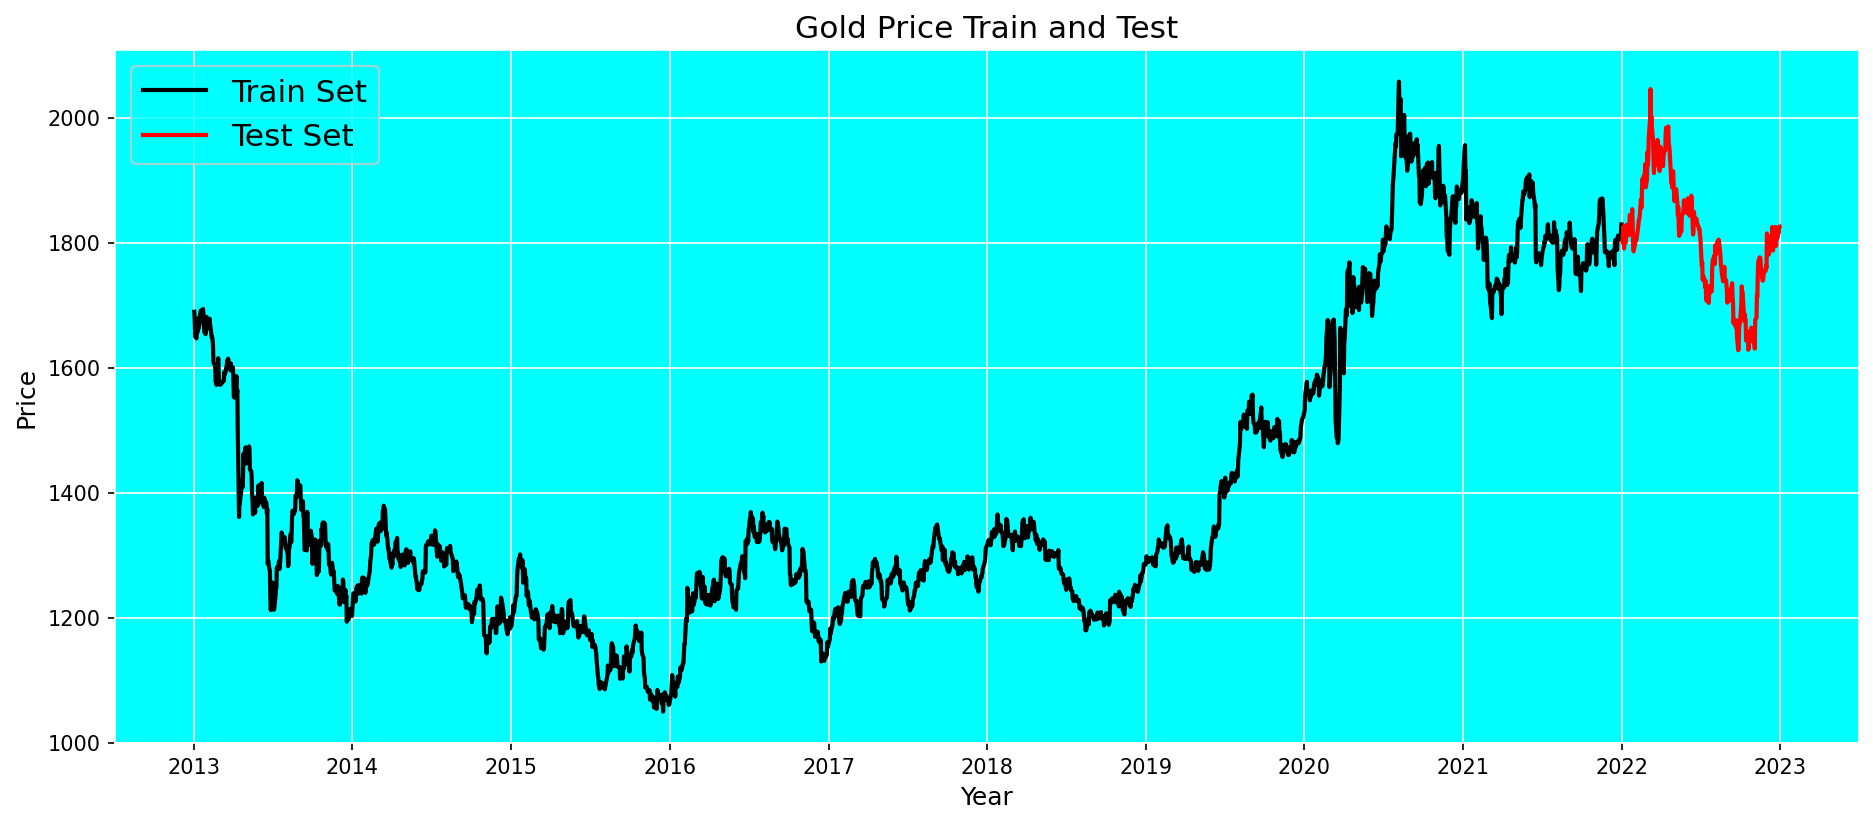

In [14]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'cyan'
plt.rc('axes', edgecolor='white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='red', lw=2)
plt.title('Gold Price Train and Test', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Train Set', 'Test Set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()


In [15]:
scaler=MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

In [16]:
window_size=60

In [17]:
train_data=df.Price[:-test_size]
train_data=scaler.transform(train_data.values.reshape(-1,1))

In [18]:
X_train = []
Y_train= []
for i in range(window_size,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  Y_train.append(train_data[i,0])


In [27]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [28]:
X_test=[]
Y_test=[]
for i in range(window_size,len(test_data)):
  X_test.append(test_data[i-60:i, 0])
  Y_test.append(test_data[i, 0])


In [29]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [30]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
Y_train=np.reshape(Y_train,(-1,1))
Y_test=np.reshape(Y_test,(-1,1))



In [31]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

X_train shape:  (2523, 60, 1)
Y_train shape:  (2523, 1)
X_test shape:  (260, 60, 1)
Y_test shape:  (260, 1)


In [32]:
def define_model():
  input1=Input(shape=(window_size,1))
  x=LSTM (units=64,return_sequences= True)(input1)
  x=Dropout(0.2)(x)
  x=LSTM(units=64,return_sequences= True)(x)
  x=Dropout(0.2)(x)
  x=LSTM(units=64)(x)
  x=Dropout(0.2)(x)
  x=Dense(32,activation='softmax')(x)
  dnn_output=Dense(1)(x)

  model=Model(inputs=input1,outputs=[dnn_output])
  model.compile(loss='mean_squared_error',optimizer='Nadam')
  model.summary()
  return model

In [33]:
model=define_model()
history=model.fit(X_train,Y_train,epochs=150,batch_size=32,validation_split=0.1,verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

In [34]:
result=model.evaluate(X_test,Y_test)
Y_pred=model.predict(X_test)

9/9 [==============================] - 1s 6ms/step


In [37]:
MAPE=mean_absolute_percentage_error(Y_test,Y_pred)
Accuracy= 1- MAPE

In [38]:
print('Test LOss:', result)
print('Test MAPE:',MAPE)
print('Test Accuracy:',Accuracy)

Test LOss: 0.0008541541756130755
Test MAPE: 0.03142606890851713
Test Accuracy: 0.9685739310914828
